<a href="https://colab.research.google.com/github/komal-SkyNET/ai-neural-networks/blob/master/google-colab/co_vid_math_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Mathematical analysis of epidemic's (CoVID19) exponential growth and significant factors 

---




In [0]:
import matplotlib.pyplot as plt
# from __future__ import division

In [0]:
class Country:

  def __init__(self, pop_size=10000):
    self.pop_size = pop_size
    self.infected_size = 1
    self.recovered_size = 0
    self.new_infections = 0

  def run_epoch(self, trans_prob, is_recover, recovery_rate):
    # new infections propotional to uninfected people & can't affect recovered people (not considering mutation scenario)
    self.new_infections = (self.pop_size - self.recovered_size - self.infected_size) * min(1, (trans_prob * self.infected_size))
    self.infected_size += self.new_infections
    if is_recover:
      self.recovered_size += (self.infected_size * recovery_rate)
      self.infected_size = self.infected_size - (self.infected_size * recovery_rate)



In [0]:
class World:

  def __init__(self, num_countries, pop_size):
    self.countries =[]
    for i in range(num_countries):
      self.countries.append(Country(pop_size))
    

In [0]:
class Epoch:

  def __init__(self, num_epoch, recovery_rate, transmission_probability, world):
    self.recovery_rate = recovery_rate
    self.transmission_probability = transmission_probability
    self.world = world
    self.num_epoch = num_epoch
    self.infected_size_trend = []

  def run(self):
    for i in range(1, self.num_epoch):
      for country in self.world.countries:
        # i%3==0; say 3 weeks is the time taken to know the outcome of infected patients
        country.run_epoch(self.transmission_probability, i%3==0, self.recovery_rate)
        print("Week: %s | Infected: %s | Recovered: %s | Infected_Percentage_Population: %f" % (i, country.infected_size, country.recovered_size, 100*country.infected_size/country.pop_size))
        self.infected_size_trend.append(country.infected_size)


Week: 1 | Infected: 20.999999199999998 | Recovered: 0 | Infected_Percentage_Population: 0.000084
Week: 2 | Infected: 440.9996304000268 | Recovered: 0 | Infected_Percentage_Population: 0.001764
Week: 3 | Infected: 555.6501992316807 | Recovered: 8705.186454629671 | Infected_Percentage_Population: 0.002223
Week: 4 | Infected: 11664.537555279878 | Recovered: 8705.186454629671 | Infected_Percentage_Population: 0.046658
Week: 5 | Infected: 244765.20593231395 | Recovered: 8705.186454629671 | Infected_Percentage_Population: 0.979061
Week: 6 | Infected: 305426.20430077985 | Recovered: 4793715.720500173 | Infected_Percentage_Population: 1.221705
Week: 7 | Infected: 5168021.039690034 | Recovered: 4793715.720500173 | Infected_Percentage_Population: 20.672084
Week: 8 | Infected: 20206284.27949983 | Recovered: 4793715.720500173 | Infected_Percentage_Population: 80.825137
Week: 9 | Infected: 1212377.0567699894 | Recovered: 23787622.94323001 | Infected_Percentage_Population: 4.849508
Week: 10 | Infect

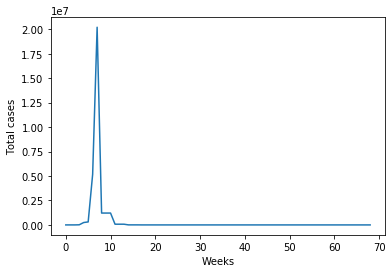

In [43]:
pop_size = 25000000
x = 20
transmission_rate = x / pop_size # say, X people can get infected by 1 infected person
recovery_rate = 0.94 # as per https://www.worldometers.info/coronavirus/
w = World(1, pop_size)
epoch = Epoch(70, recovery_rate, transmission_rate, w)
epoch.run()
plt.plot(epoch.infected_size_trend)
plt.xlabel('Weeks')
plt.ylabel('Total cases')
plt.show()